# Trabalho 1: propagação de órbitas

Luan Henrique Glasser

Professor Hélio Kuga

16/08/2021

## Considerações

Considere a condição inicial (CI) dos vetores posição e velocidade:

* $x$ = 1888980,04103698 $m$
* $y$ = 6652209,67475597 $m$
* $z$ = 902482,883545056 $m$
* $v_x$ = -9585,79511076297 $m/s$
* $v_y$ =  2413,57051166562 $m/s$
* $v_z$ =  2273,50409709003 $m/s$
 
que correspondem a uma órbita com semi-eixo maior $a$ = 34869261 $m$. Use as seguintes constantes onde necessário: $\mu$ = 3.9860064e+14 $m^3/s^2$, raio da Terra $R$ = 6378139 $m$.

---

## Preparo

A solução dos problemas deste trabalho depende das bibliotecas Numpy, Matplotlib, Pandas e de alguns resultados do trabalho 0 desta disciplina. Primeiro, as biliotecas:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

O trabalho 0 desta disciplina foi sobre integração numérica. Foram produzidas 2 classes de integradores numéricos, uma do tipo Runge-Kutta (RK) e outra do tipo Adams-Bashforth-Moulton (ABM), que herda códigos da primeira. O código para o ABM não será necessário neste trabalho. A código para o RK é descrito nas células seguintes.

In [3]:
class RungeKutta:
    '''
    Classe RungeKutta
    ---
    Contém Runge-Kuttas de 2a, 3a e 4a ordem.
    '''
        
    # Função do Runge-Kutta 2
    def rk2(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 2a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + h, x + h*k1)
        x = x + (h/2)*(k1 + k2)
        return x    

    # Função do Runge-Kutta 3
    def rk3(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 3a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + (2/3)*h, x + (2/3)*h*k1)
        k3 = eq(t + (2/3)*h, x + (2/3)*h*k2)
        x = x + (h/4)*(k1 + (3/2)*(k2 + k3))
        return x
    
    # Função do Runge-Kutta 3
    def rk4(self, eq, t, x, h):
        '''
        Esta função executa 1 passo do Runge-Kutta de 3a ordem
        ---
        Entradas: 
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            t - tempo atual de integração; 
            x - estado atual; 
            h - passo de integração.
        Retorna o próxio estado integrado.
        '''
        k1 = eq(t, x)
        k2 = eq(t + (1/2)*h, x + (1/2)*h*k1)
        k3 = eq(t + (1/2)*h, x + (1/2)*h*k2)
        k4 = eq(t + h, x + h*k3)
        x = x + (h/6)*(k1 + 2*(k2 + k3) + k4)
        return x
    
    def perturbacao(self, t, x):
        '''
        Função de perturbação para adicionar perturbações ao movimento kepleriano
        ---
        Retorna um array vazio de 3 dimensões.
        ---
        Substituir essa função por outro modelo de perturbações caso se queira 
        calcular o movimento kepleriano com perturbações.
        '''
        return np.zeros(len(x))
    
    # Função integradora
    def integrador(self, eq, metodo, t0, tf, x0, h):
        '''
        Esta função executa um método integrador sobre uma equação 
        em um intervalo de tempo a partir de um estado inicial.
        ---
        Entradas:
            eq - função com a equação a ser resolvida, deve seguir o formato eq(t, x);
            metodo - função com o metodo de integração;
            t - tempo atual de integração; 
            x - estado inicial; 
            h - passo de integração.

        '''
        # Listas para armazenar os resultados
        x_arr = []
        t_arr = []

        # Valor inicial de t
        t = t0
        x = x0

        # Armazenar os valores iniciais de t e x
        t_arr.append(t)  
        x_arr.append(x) 

        # Laço para executar os passos de integração
        #for i in np.arange(t0, tf, h):
        while t < tf:
            
            # Perturbar x
            #x += self.perturbacao(t, x)
            
            # Calcular o próximo passo
            x = metodo(eq, t, x, h)            
            
            # Atualizar t
            t += h # calcula o próximo t
            
            # Armazenar os valores de t e x
            x_arr.append(x) 
            t_arr.append(t) 

        return t_arr, x_arr

## Problema 1

Usando o método de Cowell (convencional), integre a órbita kepleriana por um período orbital, usando um Runge-Kutta 4 de passo fixo $\Delta t$ = $T / 20$, e que $T$ é o período orbital.

---

De acordo com Kuga (2021) e Fernandes e Zanardi (2018), o Método de Cowell é um método simples para resolver numericamente o movimento de um corpo de massa $m$ em órbita de um outro corpo, central, de massa $M$, com $M >> m$. Às equações do movimento kepleriano é adicionado um termo de perturbações, que computa todas as perturbações para o instante de tempo em questão e as contabiliza na equação geral. Esse processo é descrito nas equações abaixo, nas quais $r$ é o vetor posição, $v$ o vetor velocidade, $\mu$ é o parâmetro gravitacional do corpo central e $P$ é o vetor de perturbação.

\begin{equation}
\begin{split}
\dot{r} &= v\\
v &= P - \frac{\mu}{r^3} r
\end{split}
\end{equation}

Este problema requer a solução do movimento kepleriano, sem perturbações. O código para esse problema é escrito a seguir.

In [4]:
# Equações do movimento kepleriano
def movimento_kepleriano(t, x, mu = 3.9860064e5):
    '''
    Esta função calcula os diferenciais para integração numérica do problema 
    de dois corpos, num movimento kepleriano.
    ---
    Entradas:
        x = array de estado [x, y, z, dxdt, dydt, dzdt] (zerar os termos z para problema plano)
        mu = parâmetro gravitacional. O padrão é o da Terra.
    Saídas:
        drdt = array de diferencial de estado
    '''
    
    # Obter posições
    r = x[:3]
    
    # Obter derivadas de posição (velocidades) a partir do vetor de estado
    drdt = x[3:]
    
    # Obter as acelerações do problema de 2 corpos + perturbações
    dvdt = -mu*r/(np.linalg.norm(r)**3)
    
    # Montar vetor diferencial de estado
    dxdt = np.array([drdt, dvdt]).reshape(-1, )
    
    return  dxdt

É necessário determinar os elementos orbitais da órbita desse problema, para que assim seja possível calcular o período da mesma. A função abaixo realiza essa operação.

In [5]:
# Função para cálculo dos elementos keplerianos
def elementos_keplerianos(r, v, mu = 3.9860064e5):
    '''
    Cálculo dos elementos keplerianos a partir do vetor posição r e vetor velocidade v
    Entrada: r (vetor posição, km), v (vetor velocidade, km/s)
    Saída: a (semieixo maior, km), e (excentricidade), i (inclinação, graus), 
           Omega (ascensão reta do nodo ascendente, graus), omega (argumento 
           do perigeu, graus), 
           f (anomalia verdadeira, graus)
    Teste (Algoritmo 5.1 do livro Orbital Mechanics for Engineering Students de
    Curtis (2005)):
        in -> r = np.array([-6045, -3490, 2500])
              v = np.array([-3.457, 6.618, 2.533])
              mu = 3.9860064e5 parâmetro gravitacional da Terra, passível de alteração.
        out -> 
            (8788.095117377658, # a
            0.1712123462844537, # e
            153.2492285182475, # i
            255.27928533439618, # Omega
            20.06831665058256, # omega
            28.445628306614942) # f
    '''

    # Normas dos vetores posição e velocidade
    R = np.linalg.norm(r)
    V = np.linalg.norm(v)

    # Cálculo da velocidade radial
    Vr = np.dot(v, r)/R

    # Cálculo do momento angular específico
    h = np.cross(r, v)

    # Cálculo da norma do momento angular
    h_norm = np.linalg.norm(h)

    # Cálculo da inclinação
    i = acos(h[2]/h_norm)

    # Cálculo do vetor dos nodos
    K = np.array([0, 0, 1])
    N = np.cross(K, h)
    N_norm = np.linalg.norm(N)
    Omega = acos(N[0]/N_norm)
    if N[1] < 0.:
        Omega = 2*pi - Omega
    
    # Cálculo do vetor excentricidade
    e_vet = (1/mu)*((V**2 - mu/R)*r - np.dot(r, v)*v)
    e = np.linalg.norm(e_vet)

    # Cálculo do argumento do perigeu
    omega = acos(np.dot(N, e_vet)/(N_norm*e))
    if e_vet[2] < 0.:
        omega = 2*pi - omega
    
    # Cálculo da anomalia verdadeira
    f = acos(np.dot(e_vet, r)/(e*R))
    if Vr < 0.:
        omega = 2*pi - omega
    
    # Cálculo do semieixo maior
    rp = (h_norm**2/mu)*(1/(1 + e*cos(0.)))
    ra = (h_norm**2/mu)*(1/(1 + e*cos(pi)))
    a = 0.5*(rp + ra)

    return a, e, np.rad2deg(i), np.rad2deg(Omega), np.rad2deg(omega), np.rad2deg(f) 

O estado inicial é dado por:

In [6]:
r = np.array([1888.98004103698, 6652.20967475597, 902.482883545056])
v = np.array([-9.58579511076297, 2.41357051166562, 2.27350409709003])

Os elemenos orbitais são:

In [7]:
# Cálculo dos elementos keplerianos
a, e, i, Omega, omega, f = elementos_keplerianos(r, v)

# Plot dos valores calculados para os elementos orbitais
print('a =', a, 'km')
print('e =', e)
print('i =', i, 'graus')
print('Omega =', Omega, 'graus')
print('omega =', omega, 'graus')
print('f =', f, 'graus')

a = 34869.260999999904 km
e = 0.7999999999999995
i = 15.000000000000018 graus
Omega = 45.0 graus
omega = 329.99999999999994 graus
f = 0.0 graus


O período de uma órbita pode ser determinado a partir de seu semieixo maior pela equação:

\begin{equation}
T = 2 \pi \frac{a^{3/2}}{\mu^{1/2}} 
\end{equation}

que retorna um valor de:

In [8]:
mu = 3.9860064e5
T = 2*pi*(a**(3/2)/mu**(1/2))
print(T, 's')

64799.997248798194 s


Dividir $T$ por 20 dá um passo de:

In [8]:
h = T/20
print(h, 's')

3239.9998624399095 s


Com isso, os instantes inicial e final da órbita e o passo de integração são obtidos. Daí, basta integrar:

In [9]:
# Integrando uma órbita-teste com o RK4.
rk = RungeKutta()
t, x = rk.integrador(eq = movimento_kepleriano,
                     metodo = rk.rk4,
                     t0 = 0.,
                     tf = T,
                     x0 = np.array([r[0], r[1], r[2], v[0], v[1], v[2]]),
                     h = h)

Abaixo, uma função para plotar órbitas 3D é criada.

In [10]:
def plotar_orbita_terra(x1, x2, x3, titulo = 'Órbita'):
    
    # Functions from @Mateen Ulhaq and @karlo
    def set_axes_equal(ax: plt.Axes):
        """Set 3D plot axes to equal scale.
        Make axes of 3D plot have equal scale so that spheres appear as
        spheres and cubes as cubes.  Required since `ax.axis('equal')`
        and `ax.set_aspect('equal')` don't work on 3D.
        """
        limits = np.array([
            ax.get_xlim3d(),
            ax.get_ylim3d(),
            ax.get_zlim3d(),
        ])
        origin = np.mean(limits, axis = 1)
        radius = 0.5*np.max(np.abs(limits[:, 1] - limits[:, 0]))
        _set_axes_radius(ax, origin, radius)

    def _set_axes_radius(ax, origin, radius):
        x, y, z = origin
        ax.set_xlim3d([x - radius, x + radius])
        ax.set_ylim3d([y - radius, y + radius])
        ax.set_zlim3d([z - radius, z + radius])
        
    # Função para plotar a órbita em 3D
    def plotar_orbita(x1, x2, x3, ax, titulo):
        ax.plot(x1, x2, x3)
        ax.set_title(titulo, fontsize = 16, y = 1.0)
        ax.set_xlabel('X [km]')
        ax.set_ylabel('Y [km]')
        ax.set_zlabel('Z [km]')
        
    # plot earth
    r_plot = 6378.
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))*r_plot  # np.outer() -> outer vector product
    y = np.outer(np.sin(u), np.sin(v))*r_plot
    z = np.outer(np.ones(np.size(u)), np.cos(v))*r_plot

    # 3D plot
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(x, y, z, cmap = 'Blues', alpha = 0.7)
    ax.set_box_aspect((1, 1, 0.35))
    #set_axes_equal(ax)

    # Plotar órbita completa
    ax = plotar_orbita(x1, x2, x3, ax, titulo)
    plt.show()

E a órbita obtida é plotada:

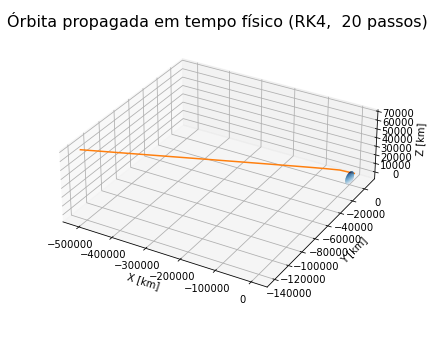

In [11]:
# Separando em 3 coordenadas os vetores posição resultados da integração
Xt = np.array(x)
xt1 = Xt[:, 0]
xt2 = Xt[:, 1]
xt3 = Xt[:, 2]
plotar_orbita_terra(xt1, xt2, xt3, titulo = 'Órbita propagada em tempo físico (RK4,  20 passos)')

## Problema 2

Usando a transformação de tempo $dt$ $=$ $r ds$ , integre a órbita kepleriana por um período orbital, usando um Runge-Kutta 4 de passo fixo ds correspondente a $t$ = $T / 20$. Lembre-se que você terá que achar os vetores posição e velocidade transformados, como condição inicial.

---

Se uma órbita elíptica ao redor da Terra for levada em consideração, um fato pode ser observado a respeito de sua integração com passo fixo, por exemplo, em um Runge-Kutta. Na região do perigeu, a velocidade é maior, enquanto que na região do apogeu a velocidade é menor. Sendo o passo de integração fixo, os arcos de trajetória no perigeu e no apogeu não possuem o mesmo comprimento. Esse efeito se propaga pela órbita e pode gerar erros numéricos.

É possível realizar uma transformação de variável, entretanto, que lida com esse problema e que aumenta a eficiência da integração, em termos computacionais. Essa transformação é chamada de Transformação de Sundman. Nela, a variável $t$, o tempo físico, é modificada para $s$, que é um tempo fictício. 

A transformação do tempo físico para o tempo fictício é dada por uma função do tipo $dt = g(r) ds$, na qual $g(r) = c r ^\alpha$. A variável $s$ é equivalente à anomalia excêntrica, reduzida por um fator de escala. Ao se escolher $c = 1$ e $\alpha = 1$, o fator de escala torna-se $\sqrt(a/\mu)$. 

A dinâmica do sistema, após a transforação de Sundman, é dada por:

\begin{equation}
r'' = \frac{1}{r} \left( |r'| r' - \mu r \right) + r^2 \left(P - \frac{\partial U}{\partial r} \right)
\end{equation}

em que $r$ é o vetor posição, o apóstrofo sobre o $r$ indica a derivada com relação ao tempo fictício, $P$ é o vetor de perturbações e $U$ a função de potencial perturbador. 

O primeiro passo para resolver este problema é criar uma equação com a dinâmica que se utiliza do tempo fictício $s$. A função abaixo serve a esse propósito. 

In [12]:
def eq_s(t, x, mu = 3.9860064e5):
    '''
    Função para a dinâmica com o tempo fictício
    ---
    Entradas:
        t = tempo físico, não utilizado aqui, mas deixado nos 
            argumentos para não dar erro no integrador
        x = estado (posição e velocidade)
    Retorna:
        dxdt = array com os diferenciais dos elementos 
               dos vetores x e v e com o tempo fictício
    '''
    
    # Captando variáveis
    r = x[:3]
    v = x[3:6]
    ts = x[6]
    
    # Calculando as normas de r e v
    r_norm = np.linalg.norm(r)
    v_norm = np.dot(r, v)/r_norm
    
    # Calculando os diferenciais com relação ao tempo fictício
    drds = v
    dvds = (1/r_norm)*(v_norm*v - mu*r)
    dtds = r_norm
    
    # Montando o diferencial
    dxdt = np.array([drds[0], drds[1], drds[2], 
                     dvds[0], dvds[1], dvds[2],
                     dtds])
    
    return dxdt

As velocidades precisam ser transformadas de $dr/dt$ para $dr/ds$. Isso pode ser realizado por $dr/ds = |r| dr/dt$, em que $|r|$ é a magnitude do vetor posição no instante inicial. Assim:

In [13]:
r_norm = np.linalg.norm(r)
vs = v*r_norm

É necessário conhecer os limites do tempo fictício para realizar a integração. Em um período, a anomalia excêntrica vale $2\pi$, de modo que nesse instante $s = 2 \pi \sqrt(a/\mu)$, cujo valor é:

In [14]:
s0 = 0.
sf = 2*np.pi*np.sqrt(a/mu)
print(sf, 's/km')

1.858370249051116 s/km


O passo de integração é o valor final de $s$, calculado acima, divido por 20:

In [15]:
hs = sf/20
print(hs, 's/km')

0.09291851245255581 s/km


O estado inicial é dado por:

In [16]:
xs0 = np.concatenate((r, vs, np.array([s0])), axis = None)
print(xs0)

[  1888.98004104   6652.20967476    902.48288355 -66849.91832194
  16831.88402263  15855.0815492       0.        ]


Por fim, a integração com o RK4 é realizada.

In [17]:
ts, xs = rk.integrador(eq = eq_s,
                       metodo = rk.rk4,
                       t0 = s0,
                       tf = sf,
                       x0 = xs0,
                       h = hs)

Abaixo, uma função para converter as velocidades para o domínio do tempo físico é criada e aplicada.

In [18]:
def vs2vt(xs):
    '''
    Função para converter as velocidades de s para t
    ---
    Entradas:
        xs = estados com v em s
    Saídas:
        t = tempo fictício
        x = estados com v em t
    '''
    xs = np.array(xs)
    r = xs[:, :3]
    vs = xs[:, 3:6]
    v = vs.copy()
    t = xs[:, 6]
    
    for i, tt in enumerate(t):
        R = np.linalg.norm(r[i, :])
        v[i, :] = v[i, :]/R
    
    return t, np.concatenate((r, v), axis = 1)

# Obter valores convertidos de estado
ts, xs = vs2vt(xs)

A órbita obtida com 20 passos, integrada com tempo fictício, é mostrada a seguir.

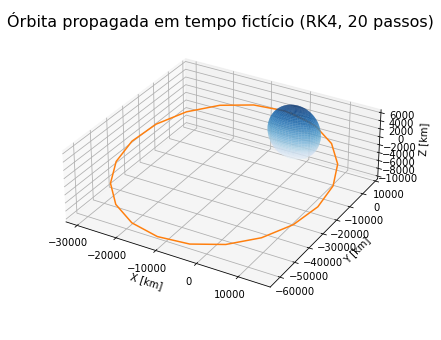

In [19]:
# Separando em 3 coordenadas os vetores posição resultados da integração
Xs = np.array(xs)
xs1 = Xs[:, 0]
xs2 = Xs[:, 1]
xs3 = Xs[:, 2]
plotar_orbita_terra(xs1, xs2, xs3, titulo = 'Órbita propagada em tempo fictício (RK4, 20 passos)')

## Problema 3

Compare as 2 soluções. Qual fornece a solução mais precisa? Para poder comparar, lembre-se que você terá que transformar a solução, do item 2, para os vetores posição e velocidade.

---

Para comparar as duas soluções, primeiro, as duas órbitas 3D serão plotadas no mesmo gráfico. Isso é mostrado abaixo.

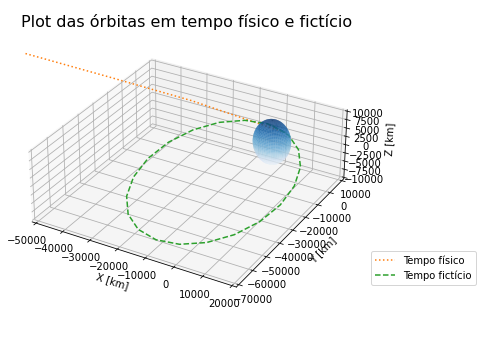

In [20]:
# Plotando as duas órbitas em uma
def plotar_orbita_terra(xt1, xt2, xt3, xs1, xs2, xs3):
    
    # Functions from @Mateen Ulhaq and @karlo
    def set_axes_equal(ax: plt.Axes):
        """Set 3D plot axes to equal scale.
        Make axes of 3D plot have equal scale so that spheres appear as
        spheres and cubes as cubes.  Required since `ax.axis('equal')`
        and `ax.set_aspect('equal')` don't work on 3D.
        """
        limits = np.array([
            ax.get_xlim3d(),
            ax.get_ylim3d(),
            ax.get_zlim3d(),
        ])
        origin = np.mean(limits, axis = 1)
        radius = 0.5*np.max(np.abs(limits[:, 1] - limits[:, 0]))
        _set_axes_radius(ax, origin, radius)

    def _set_axes_radius(ax, origin, radius):
        x, y, z = origin
        ax.set_xlim3d([x - radius, x + radius])
        ax.set_ylim3d([y - radius, y + radius])
        ax.set_zlim3d([z - radius, z + radius])
        
    # Função para plotar a órbita em 3D
    def plotar_orbita(x1, x2, x3, ax, **kwargs):
        ax.plot(x1, x2, x3, **kwargs)
        ax.set_xlabel('X [km]')
        ax.set_ylabel('Y [km]')
        ax.set_zlabel('Z [km]')
        
    # plot earth
    r_plot = 6378.
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))*r_plot  # np.outer() -> outer vector product
    y = np.outer(np.sin(u), np.sin(v))*r_plot
    z = np.outer(np.ones(np.size(u)), np.cos(v))*r_plot

    # 3D plot
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(x, y, z, cmap = 'Blues', alpha = 0.7)
    ax.set_box_aspect((1, 1, 0.35))

    # Plotar órbita completa
    plotar_orbita(xt1, xt2, xt3, ax, linestyle = ':')
    plotar_orbita(xs1, xs2, xs3, ax, linestyle = '--')
    ax.set_xlim(-50000, 20000)
    ax.set_ylim(-70000, 10000)
    ax.set_zlim(-10000, 10000)
    ax.set_title('Plot das órbitas em tempo físico e fictício', fontsize = 16, y = 1.0)
    plt.legend(['Tempo físico', 'Tempo fictício'], 
                bbox_to_anchor = (1.05, .2), loc = 'center left')
    plt.show()

# Plotar órbitas
plotar_orbita_terra(xt1, xt2, xt3, xs1, xs2, xs3)

O gráfico acima foi montado com os resultados de tempo físico e fictício. Com relação ao tempo físico, o passo $h$ foi calculado dividindo-se o período $T$ por 20. No caso do tempo fictício, foi calculado o $S$ final e o passo $h$ foi calculado com a divisão do tempo fictício por 20. A seguir, uma função é criada para que esses resultados sejam computados em um dataframe, as normas de posição calculadas e os gráficos feitos para comparação. 

In [21]:
def gerar_df_dif_passos(N):
    '''
    Esta função gera um dataframe de dados calculados no tempo
    e no tempo fictício, com passos de integração, respectivamente,
    dados por h = T/N e h = S/N.
    '''
    
    # Parâmetros
    mu = 3.9860064e5
    T = 64799.997248798194
    a = 34869.260999999904

    # Estado inicial
    r = np.array([1888.98004103698, 6652.20967475597, 902.482883545056])
    v = np.array([-9.58579511076297, 2.41357051166562, 2.27350409709003])
    
    # Vetor de estado incial
    Xt = np.concatenate((r, v), axis = None)

    # Passo de integração no temp
    ht = T/N

    # Integrar no tempo
    tt, xt = rk.integrador(eq = movimento_kepleriano,
                           metodo = rk.rk4,
                           t0 = 0.,
                           tf = T,
                           x0 = Xt,
                           h = ht)


    # Estado inicial no tempo fictício
    r_norm = np.linalg.norm(r)
    Xs = np.concatenate((r, v*r_norm, np.array([0.])), axis = None)

    # Preparar condição inicial do tempo fictício
    s0 = 0.
    sf = 2*np.pi*np.sqrt(a/mu)

    # Passo de integração do tempo fictício
    hs = sf/N

    # Integrar
    ts, xs = rk.integrador(eq = eq_s,
                           metodo = rk.rk4,
                           t0 = s0,
                           tf = sf,
                           x0 = Xs,
                           h = hs)
    
    # Desconverter tempo e estado
    ts, xs = vs2vt(xs)
    
    # Transformar em arrays
    ts = np.array(ts)
    tt = np.array(tt)
    xs = np.array(xs)
    xt = np.array(xt)   
    
    # Juntar vetores
    #TT = np.array([tt, ts]).reshape(2, len(t)).T
    #XX = np.concatenate((x, xs), axis = 1) 
    
    # Concatenar
    #X =  np.column_stack((TT, XX))
    X =  np.column_stack((tt, ts, xt, xs))
    df = pd.DataFrame(X, columns = ['$T_t$', '$T_s$',
                                    '$X_t$', '$Y_t$', '$Z_t$',
                                    '$V_{x,t}$', '$V_{y,t}$', '$V_{z,t}$',
                                    '$X_s$', '$Y_s$', '$Z_s$',
                                    '$V_{x,s}$', '$V_{y,s}$', '$V_{z,s}$'])
    
    df['$R_{t,norma}$'] = np.sqrt(df['$X_t$']**2 + df['$Y_t$']**2 + df['$Z_t$']**2)
    df['$R_{s,norma}$'] = np.sqrt(df['$X_s$']**2 + df['$Y_s$']**2 + df['$Z_s$']**2)
    df['$V_{t,norma}$'] = np.sqrt(df['$V_{x,t}$']**2 + df['$V_{y,t}$']**2 + df['$V_{z,t}$']**2)
    df['$V_{s,norma}$'] = np.sqrt(df['$V_{x,s}$']**2 + df['$V_{y,s}$']**2 + df['$V_{z,s}$']**2)
    
    return df

A seguir, uma função para criar os gráficos comparados é escrita.

In [22]:
def plotar_comparacao(df, N):
    '''
    Função paracomparar plots de órbita    
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, sharex = True, figsize = (12, 4))

    ax1.plot(df['$T_t$'], df['$R_{t,norma}$'], linestyle = '--')
    ax1.plot(df['$T_s$'], df['$R_{s,norma}$'], linestyle = ':')
    ax1.legend(['Tempo físico', 'Tempo fictício'])
    ax1.grid()
    ax1.set_xlabel('$Tempo \: [s]$')
    ax1.set_ylabel('$R_{norma} \: [km]$')

    ax2.plot(df['$T_t$'], df['$V_{t,norma}$'], linestyle = '--')
    ax2.plot(df['$T_s$'], df['$V_{s,norma}$'], linestyle = ':')
    ax2.legend(['Tempo físico', 'Tempo fictício'])
    ax2.grid()
    ax2.set_xlabel('$Tempo \: [s]$')
    ax2.set_ylabel('$V_{norma} \: [km/s]$')

    plt.suptitle('Comparação das normas de posição e velocidade - N = ' + str(N))

Para comparar os resultados calculados com tempo físico e com tempo fictício, as normas de posição e velocidade para os dois tempos serão criadas e plotadas para cada $N$ da seguinte lista: [20, 50, 100, 1000]. Cada $N$ divide $T$ e $S$, então ao aumentar o $N$, a quantidade de passos de integração é aumentada e o tamanho do passo de integração é diminuído. Isso resulta em uma integração mais precisa. Veja abaixo os gráficos.

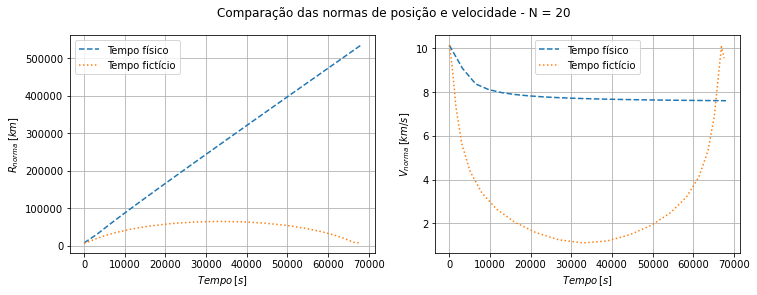

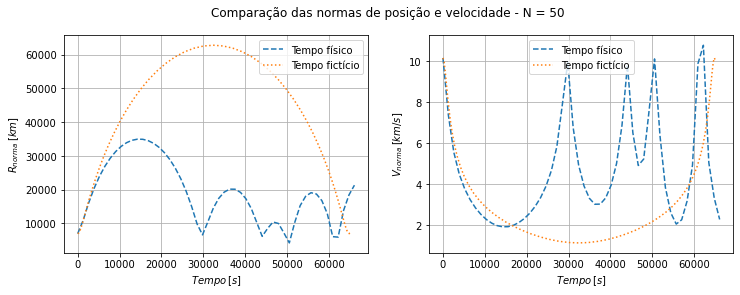

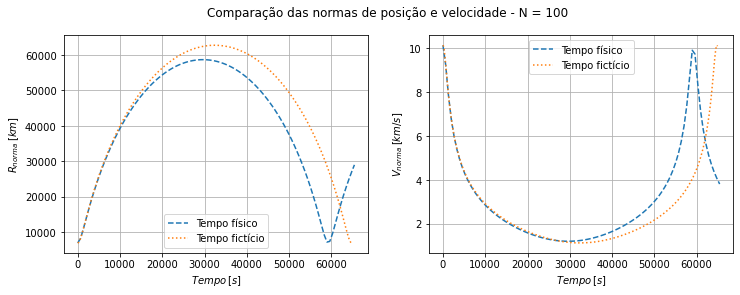

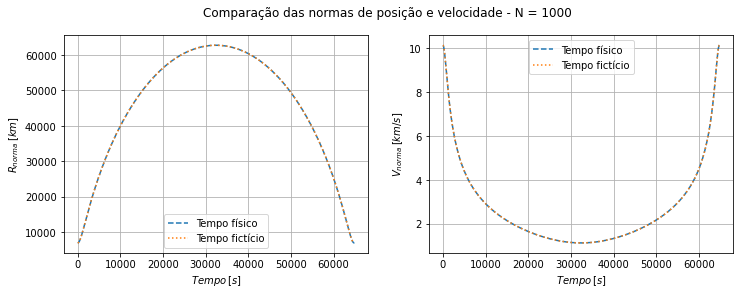

In [23]:
N_lista = [20, 50, 100, 1000]

for N in N_lista:
    df = gerar_df_dif_passos(N = N)
    plotar_comparacao(df, N)

Analisando os gráficos acima, é possível notar que a integração no tempo físico, com $N = 20$ gera resultados discrepantes dos de tempo fictício. Mas conforme $N$ aumenta, os resultados de tempo físico convergem para os de tempo fictício. Um $N = 1000$ gera resultados indistinguíveis entre tempos físico e fictício, na escala do gráfico. Com base na comparação de resultados, fica claro que o método com o tempo fictício, que se utiliza da Transformação de Sundman, requer um custo computacional menor para gerar resultados razoáveis, com relação ao método de Cowell.

## Referências

KUGA, H. Notas de Aula da Disciplina Satélites Artificiais -  Movimento Orbital. Capítulo 6 - Métodos de Integração de Órbita. Instituto Nacional de Pesquisas Espaciais. 2021.

FERNANDES, S. ZANARDI, C. Fundamentos de Astronáutica. Editora UFABC, 1ed, Vol. 2. 2018.

FRANCO, N. Cálculo Numérico. Pearson Universidades. 1 ed. 2006.

HOFFMAN, J. Numerical Methods for Engineers and Scientists. Purdue University. 1 ed. 1992.

CURTIS, H. Orbital Mechanics for Engineering Students. Elsevier. 4 ed. 2020.

In [36]:
np.array(t)

array([    0.        ,  3239.99986244,  6479.99972488,  9719.99958732,
       12959.99944976, 16199.9993122 , 19439.99917464, 22679.99903708,
       25919.99889952, 29159.99876196, 32399.9986244 , 35639.99848684,
       38879.99834928, 42119.99821172, 45359.99807416, 48599.9979366 ,
       51839.99779904, 55079.99766148, 58319.99752392, 61559.99738636,
       64799.9972488 , 68039.99711124])